In [1]:
import os
import cv2

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pygmt
from salvus import namespace as sn
from salvus.mesh.unstructured_mesh_utils import extract_model_to_regular_grid
import geopandas as gpd

import image_similarity_measures
from image_similarity_measures.quality_metrics import ssim, fsim, issm, uiq


   ┌───────────────────────────────────────────────────────────────────┐
   │                                                                   │
   │   Salvus update available!                                        │
   │                                                                   │
   │   0.12.9 → 0.12.10                                                │
   │                                                                   │
   │   See https://mondaic.com/docs/updates/changelog                  │
   │   for a list of changes and new features.                         │
   │                                                                   │
   │   To upgrade, first update your conda environment with:           │
   │                                                                   │
   │   wget https://mondaic.com/environment.yml -O ~/environment.yml   │
   │   conda env update -n salvus -f ~/environment.yml                 │
   │                                              

In [2]:
sp = xr.open_dataset('/Users/claired/Desktop/Salvus/SPiRaL_20s_mesh.nc')
ws = xr.open_dataset('/Users/claired/Desktop/Salvus/WUS256_20s_mesh.nc')
cs = xr.open_dataset('/Users/claired/Desktop/Salvus/CSEM_20s_mesh.nc')

In [2]:
lat_min = 31.5
lat_max = 43
lon_min = -125.0
lon_max = -114.0

#dep = 75e3

In [5]:
proj_path = '/Volumes/Salvus_Data/Research/LLNL/'

spi = sn.Project(path= proj_path + "CANV_FULL")
wus = sn.Project(path=proj_path + 'CANV256')
csem = sn.Project(path=proj_path + 'CANV_CSEM')

Accordion(children=(HTML(value='\n                <head>\n                <style>\n                td {\n     …

Accordion(children=(HTML(value='\n                <head>\n                <style>\n                td {\n     …

Accordion(children=(HTML(value='\n                <head>\n                <style>\n                td {\n     …

In [6]:
#Read in CANV_SP model 
simulation_config = spi.inversions.get_simulation_name(
        inverse_problem_configuration= "inversion_1_r3", iteration_id = 1)

sp_mesh = spi.simulations.get_mesh(simulation_config)

sp_dep = xr.Dataset(
    coords={
        "longitude": np.linspace(lon_min, lon_max, 101),
        "latitude": np.linspace(lat_min, lat_max, 101),
        "depth": np.linspace(0, 100e3, 100),
    },
    attrs={"radius_in_meters": 6371e3},
)

sp_dep = extract_model_to_regular_grid(
    sp_mesh, sp_dep, ["VSV", "VSH","VPV","VPH"], verbose=True
)

sp_dep.to_netcdf('CANV_SP_Current07072022.nc')

#Read in CANV256 model
simulation_config = wus.inversions.get_simulation_name(
        inverse_problem_configuration= "inversion_2_fixed", iteration_id = 25)

wus_mesh = wus.simulations.get_mesh(simulation_config)

wus_dep = xr.Dataset(
    coords={
        "longitude": np.linspace(lon_min, lon_max, 101),
        "latitude": np.linspace(lat_min, lat_max, 101),
        "depth": np.linspace(0, 100e3, 100),
    },
    attrs={"radius_in_meters": 6371e3},
)

wus_dep = extract_model_to_regular_grid(
    wus_mesh, wus_dep, ["VSV", "VSH","VPV","VPH"], verbose=True
)

wus_dep.to_netcdf('CANV_WUS_Current07072022.nc')

#Read in CANV_CSEM model
simulation_config = csem.inversions.get_simulation_name(
        inverse_problem_configuration= "inversion_2_r2", iteration_id = 23)

csem_mesh = csem.simulations.get_mesh(simulation_config)

csem_dep = xr.Dataset(
    coords={
        "longitude": np.linspace(lon_min, lon_max, 101),
        "latitude": np.linspace(lat_min, lat_max, 101),
        "depth": np.linspace(0, 100e3, 100),
    },
    attrs={"radius_in_meters": 6371e3},
)

csem_dep = extract_model_to_regular_grid(
    csem_mesh, csem_dep, ["VSV", "VSH","VPV","VPH"], verbose=True)

csem_dep.to_netcdf('CANV_CSEM_Current07072022.nc')

Finding enclosing elements (pass 1 of 4):   0%|          | 0/1020100 [00:00<?, ?it/s]

Finding enclosing elements (pass 2 of 4):   0%|          | 0/96383 [00:00<?, ?it/s]

Finding enclosing elements (pass 3 of 4):   0%|          | 0/30306 [00:00<?, ?it/s]

Finding enclosing elements (pass 4 of 4):   0%|          | 0/11252 [00:00<?, ?it/s]

[2022-07-07 12:42:37,849] WARNING - salvus.mesh.unstructured_mesh_utils: 10059 points were not claimed by enclosing elements. Depending on your use case, this may not be an issue.


Interpolating parameters:   0%|          | 0/1020100 [00:00<?, ?it/s]

Finding enclosing elements (pass 1 of 4):   0%|          | 0/1020100 [00:00<?, ?it/s]

Finding enclosing elements (pass 2 of 4):   0%|          | 0/103972 [00:00<?, ?it/s]

Finding enclosing elements (pass 3 of 4):   0%|          | 0/39837 [00:00<?, ?it/s]

Finding enclosing elements (pass 4 of 4):   0%|          | 0/12763 [00:00<?, ?it/s]

[2022-07-07 12:43:22,348] WARNING - salvus.mesh.unstructured_mesh_utils: 10067 points were not claimed by enclosing elements. Depending on your use case, this may not be an issue.


Interpolating parameters:   0%|          | 0/1020100 [00:00<?, ?it/s]

Finding enclosing elements (pass 1 of 4):   0%|          | 0/1020100 [00:00<?, ?it/s]

Finding enclosing elements (pass 2 of 4):   0%|          | 0/96793 [00:00<?, ?it/s]

Finding enclosing elements (pass 3 of 4):   0%|          | 0/30485 [00:00<?, ?it/s]

Finding enclosing elements (pass 4 of 4):   0%|          | 0/11332 [00:00<?, ?it/s]

[2022-07-07 12:44:07,764] WARNING - salvus.mesh.unstructured_mesh_utils: 10059 points were not claimed by enclosing elements. Depending on your use case, this may not be an issue.


Interpolating parameters:   0%|          | 0/1020100 [00:00<?, ?it/s]

In [19]:
depths = np.arange(5e3, 80e3, 5e3)

In [20]:
for dep in depths:
    path = './SSIM/'+ str(dep/1000)+'km/'
    
    vsv_sp = sp.VSV.sel(depth=dep,method='nearest')
    vsh_sp = sp.VSH.sel(depth=dep,method='nearest')
    vav_sp = np.sqrt(((2*(vsh_sp)**2)+vsv_sp**2)/3)
    #vav_sp = vav_sp.values

    vsv_cnsp = sp_dep.VSV.sel(depth=dep,method='nearest')
    vsh_cnsp = sp_dep.VSH.sel(depth=dep,method='nearest')
    vav_cnsp = np.sqrt(((2*(vsh_cnsp)**2)+vsv_cnsp**2)/3)
    #vav_cnsp = vav_cnsp.values

    vsv_ws = ws.VSV.sel(depth=dep,method='nearest')
    vsh_ws = ws.VSH.sel(depth=dep,method='nearest')
    vav_ws = np.sqrt(((2*(vsh_ws)**2)+vsv_ws**2)/3)
    #vav_ws = vav_ws.values

    vsv_cnws = wus_dep.VSV.sel(depth=dep,method='nearest')
    vsh_cnws = wus_dep.VSH.sel(depth=dep,method='nearest')
    vav_cnws = np.sqrt(((2*(vsh_cnws)**2)+vsv_cnws**2)/3)
    #vav_cnws = vav_cnws.values

    vsv_cs = cs.VSV.sel(depth=dep,method='nearest')
    vsh_cs = cs.VSH.sel(depth=dep,method='nearest')
    vav_cs = np.sqrt(((2*(vsh_cs)**2)+vsv_cs**2)/3)
    #vav_cs = vav_cs.values

    vsv_cncs = csem_dep.VSV.sel(depth=dep,method='nearest')
    vsh_cncs = csem_dep.VSH.sel(depth=dep,method='nearest')
    vav_cncs = np.sqrt(((2*(vsh_cncs)**2)+vsv_cncs**2)/3)
    #vav_cncs = vav_cncs.values

    cbar_min = (min([vav_sp.min().values,vav_cnsp.min().values, 
               vav_ws.min().values, vav_cnws.min().values, 
               vav_cs.min().values,vav_cncs.min().values]))

    cbar_max = (max([vav_sp.max().values,vav_cnsp.max().values, 
               vav_ws.max().values, vav_cnws.max().values, 
               vav_cs.max().values,vav_cncs.max().values]))

    n = 0

    for model in [vav_sp, vav_cnsp, vav_ws, vav_cnws, vav_cs, vav_cncs]:
        fig = pygmt.Figure()

        cmap = 'gray'
        fig.grdimage(grid=pygmt.grdclip(model, below=[cbar_min,cbar_min], above=[cbar_max,cbar_max]), 
                      projection='L-119.5/37.25/31.5/43.0/7.5c', region = [-124.5,-114.15,32.6,42],cmap=cmap, frame = None)

        if n == 0:
            fig.savefig(path+'SPRL_VS_'+str(dep/1000)+'km.png', transparent=True)
            n+=1
        elif n ==1:
            fig.savefig(path + 'CNSP_VS_'+str(dep/1000)+'km.png', transparent=True)
            n+= 1
        elif n ==2:
            fig.savefig(path + 'WUS2_VS_'+str(dep/1000)+'km.png', transparent=True)
            n +=1
        elif n==3:
            fig.savefig(path + 'CNWS_VS_'+str(dep/1000)+'km.png', transparent=True)
            n+= 1
        elif n==4:
            fig.savefig(path + 'CSEM_VS_'+str(dep/1000)+'km.png', transparent=True)
            n+=1
        elif n == 5:
            fig.savefig(path + 'CNCS_VS_'+str(dep/1000)+'km.png', transparent=True)
            n+=1


In [10]:
# from skimage.util import random_noise

# for file in os.listdir(path):
#     img_path = os.path.join(path,file)
#     if img_path == './SSIM/.DS_Store' or img_path == './SSIM/background.png':
#         pass
#     else:
#         img = cv2.imread(img_path)
#         bg = cv2.imread(path+'background.png')
#         hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#         # define range of white color in HSV
#         lower_white = np.array([0,0,0])
#         upper_white = np.array([0,0,254])

#         # Get mask around CA, and then the inverse mask of that as well.
#         mask = cv2.inRange(hsv, lower_white, upper_white)
#         mask_inv = cv2.bitwise_not(mask)
#         # Make background around CA transparent
#         res = cv2.bitwise_and(img, img, mask=mask)
#         res = cv2.cvtColor(res, cv2.COLOR_BGR2BGRA)

#         res[:, :, 3] = mask
        
#         #Add white noise to background image, then add the two images together
        
#         noise_img = random_noise(bg, mode='s&p')
#         noise_img = (255*noise_img).astype(np.uint8)
        
#         background = cv2.bitwise_and(noise_img, noise_img, mask=mask_inv)
#         background = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
#         noise_image = cv2.cvtColor(background, cv2.COLOR_BGR2BGRA)

#         noise_image[:, :, 3] = mask_inv
        
#         final = noise_image + res
        
#         # Save result
#         cv2.imwrite(img_path,final)

In [2]:
from image_similarity_measures.quality_metrics import ssim

path = './SSIM/'

path_list = ["./SSIM/5.0km", "./SSIM/10.0km", "./SSIM/15.0km","./SSIM/20.0km", "./SSIM/25.0km", "./SSIM/30.0km",
            "./SSIM/35.0km", "./SSIM/40.0km", "./SSIM/45.0km","./SSIM/50.0km", "./SSIM/55.0km", "./SSIM/60.0km",
            "./SSIM/65.0km", "./SSIM/70.0km", "./SSIM/75.0km"]
ssim_list = {}

for path in path_list:
    new_path = path
    for ofile in os.listdir(new_path):
        orig_file = os.path.join(new_path,ofile)
        if orig_file == new_path + '/.DS_Store':
            pass
        else:
            test_img = cv2.imread(orig_file)
            for file in os.listdir(new_path):
                img_path = os.path.join(new_path,file)
                if img_path == new_path + '/.DS_Store':
                    pass
                else:
                    comp_img = cv2.imread(img_path)
                    if ofile == file:
                        pass
                    else:
                        key = ofile[0:4]+'-'+file[0:4]
                        ssim_val = ssim(test_img, comp_img)
                        if key not in ssim_list:
                            ssim_list[key] = list()
                        ssim_list[key].extend([ssim_val])

/Users/claired/anaconda3/envs/salvus2/lib/python3.7/site-packages/image_similarity_measures/quality_metrics.py:197: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(org_img, pred_img, data_range=max_p, multichannel=True)


In [3]:
print(ssim_list)

{'WUS2-CNWS': [0.9910467533591691, 0.9742707366601381, 0.9717253105912592, 0.967215127761198, 0.9478806252340842, 0.9766345942861004, 0.9798770689003292, 0.9441544157440638, 0.9419154227836563, 0.9399814996412624, 0.9398698681873349, 0.9402701884478887, 0.9372087373153195, 0.9295229083262327, 0.9237310719784602], 'WUS2-CNCS': [0.96092958651411, 0.9818146312410253, 0.9654484371072268, 0.9548501488035845, 0.919887268751797, 0.8971222368853886, 0.9320947166030656, 0.9132100624095356, 0.9006536978401011, 0.8722376343203965, 0.8581494479969974, 0.86434597257383, 0.8591874628054973, 0.8559560715140764, 0.8830982419414358], 'WUS2-CSEM': [0.894394563317307, 0.909747820369971, 0.9194851436041316, 0.9226439744089375, 0.9165865509236255, 0.870042955539993, 0.7736634085406232, 0.8186383623012509, 0.8425691383135924, 0.8656496405673787, 0.8715171591875425, 0.8704176677003508, 0.8746772868645053, 0.8865977346839808, 0.9049570270055961], 'WUS2-CNSP': [0.9814485486039217, 0.970182692573983, 0.96749548

In [4]:
print(ssim_list['CNCS-CNSP'], ssim_list['CNCS-CNWS'], ssim_list['CNWS-CNSP'])

[0.96186975782229, 0.9823268408669595, 0.9873692139763569, 0.9783202664518904, 0.9679706697125869, 0.9111506919887992, 0.9401984241010232, 0.9458474023327228, 0.9510369493922192, 0.9401949717718835, 0.9333482241234939, 0.9470269676341271, 0.9465653289255537, 0.9426369572290866, 0.9514216013107674] [0.9695251282981664, 0.9796473277892598, 0.9805820153805108, 0.967747521402551, 0.9704904822454975, 0.9129031843988894, 0.9436408417359518, 0.945129515251066, 0.9481671392591701, 0.9337586211723788, 0.9216605456432836, 0.9223708592380087, 0.9203265119935043, 0.9192590672458416, 0.9432841547721652] [0.9832357607755547, 0.9868939260908958, 0.9883040056219413, 0.9883794750288201, 0.982913686446707, 0.9852809895984557, 0.9872128564817303, 0.9631359084352402, 0.9574276199217034, 0.9512700999396605, 0.946997469774682, 0.9459798672764678, 0.9453344102621614, 0.9413571384155274, 0.9335608784310313]


In [5]:
print(ssim_list['SPRL-CNSP'], ssim_list['SPRL-CNWS'], ssim_list['SPRL-CNSP'])

[0.9470263487472771, 0.9687697581502389, 0.8825892041433724, 0.9135806483835628, 0.9518152103859654, 0.9653048746616905, 0.9867818235788194, 0.8525949815075289, 0.8486110905927241, 0.8579839014246518, 0.8644709602192374, 0.8812229103446155, 0.8953216743212669, 0.9027300983398449, 0.9043698116485142] [0.933158302662774, 0.9556294035922003, 0.8696242384186769, 0.9030091940999742, 0.9383977668720712, 0.9550538171494652, 0.9758615890257581, 0.8711387366671595, 0.8701140269347589, 0.8778373707561613, 0.8800286313004132, 0.8811668971820973, 0.8760001459220591, 0.8572042101577207, 0.8304537227433156] [0.9470263487472771, 0.9687697581502389, 0.8825892041433724, 0.9135806483835628, 0.9518152103859654, 0.9653048746616905, 0.9867818235788194, 0.8525949815075289, 0.8486110905927241, 0.8579839014246518, 0.8644709602192374, 0.8812229103446155, 0.8953216743212669, 0.9027300983398449, 0.9043698116485142]


In [6]:
print(ssim_list['WUS2-CNSP'], ssim_list['WUS2-CNWS'], ssim_list['WUS2-CNSP'])

[0.9814485486039217, 0.970182692573983, 0.9674954883687077, 0.9638445697219066, 0.9554708493200778, 0.9684145246380905, 0.9859406012921147, 0.9291041945254692, 0.9245076336910653, 0.9222599644698882, 0.9170913588298929, 0.9061187943803715, 0.8968529432661377, 0.8944477372973344, 0.9028887167881207] [0.9910467533591691, 0.9742707366601381, 0.9717253105912592, 0.967215127761198, 0.9478806252340842, 0.9766345942861004, 0.9798770689003292, 0.9441544157440638, 0.9419154227836563, 0.9399814996412624, 0.9398698681873349, 0.9402701884478887, 0.9372087373153195, 0.9295229083262327, 0.9237310719784602] [0.9814485486039217, 0.970182692573983, 0.9674954883687077, 0.9638445697219066, 0.9554708493200778, 0.9684145246380905, 0.9859406012921147, 0.9291041945254692, 0.9245076336910653, 0.9222599644698882, 0.9170913588298929, 0.9061187943803715, 0.8968529432661377, 0.8944477372973344, 0.9028887167881207]


In [7]:
print(ssim_list['CSEM-CNSP'], ssim_list['CSEM-CNWS'], ssim_list['CSEM-CNSP'])

[0.9018087976878387, 0.9216720038998308, 0.9146879828528413, 0.9153537870195247, 0.921268866672916, 0.8556187803886061, 0.7778034668670758, 0.8072311763422059, 0.8259027448979356, 0.8344922889678634, 0.8359235126273253, 0.8331882061407857, 0.8322962786873095, 0.8368991361874595, 0.8469184492258166] [0.8922490983596484, 0.9025108153290476, 0.8955414668772299, 0.8996543825688779, 0.9206903391072475, 0.8549980878322044, 0.7906649433916001, 0.8253198242889725, 0.8471631457181501, 0.8543744150375673, 0.8580294038765067, 0.8559972125757737, 0.8543478792056381, 0.8631008949146529, 0.8789731412504884] [0.9018087976878387, 0.9216720038998308, 0.9146879828528413, 0.9153537870195247, 0.921268866672916, 0.8556187803886061, 0.7778034668670758, 0.8072311763422059, 0.8259027448979356, 0.8344922889678634, 0.8359235126273253, 0.8331882061407857, 0.8322962786873095, 0.8368991361874595, 0.8469184492258166]


In [8]:
unique = ['SPRL-WUS2', 'SPRL-CSEM', 'WUS2-CSEM',
          'SPRL-CNSP',  'WUS2-CNWS', 'CSEM-CNCS',
          'CNCS-CNSP','CNCS-CNWS','CNWS-CNSP']

plot_vals = {}

for key in ssim_list:
    if key in unique:
        print(key)
        plot_vals[key] = list()
        plot_vals[key].extend(ssim_list[key])
    else:
        pass

WUS2-CNWS
WUS2-CSEM
CNWS-CNSP
CNCS-CNWS
CNCS-CNSP
CSEM-CNCS
SPRL-WUS2
SPRL-CSEM
SPRL-CNSP


In [9]:
print(len(plot_vals), len(ssim_list))

9 30


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

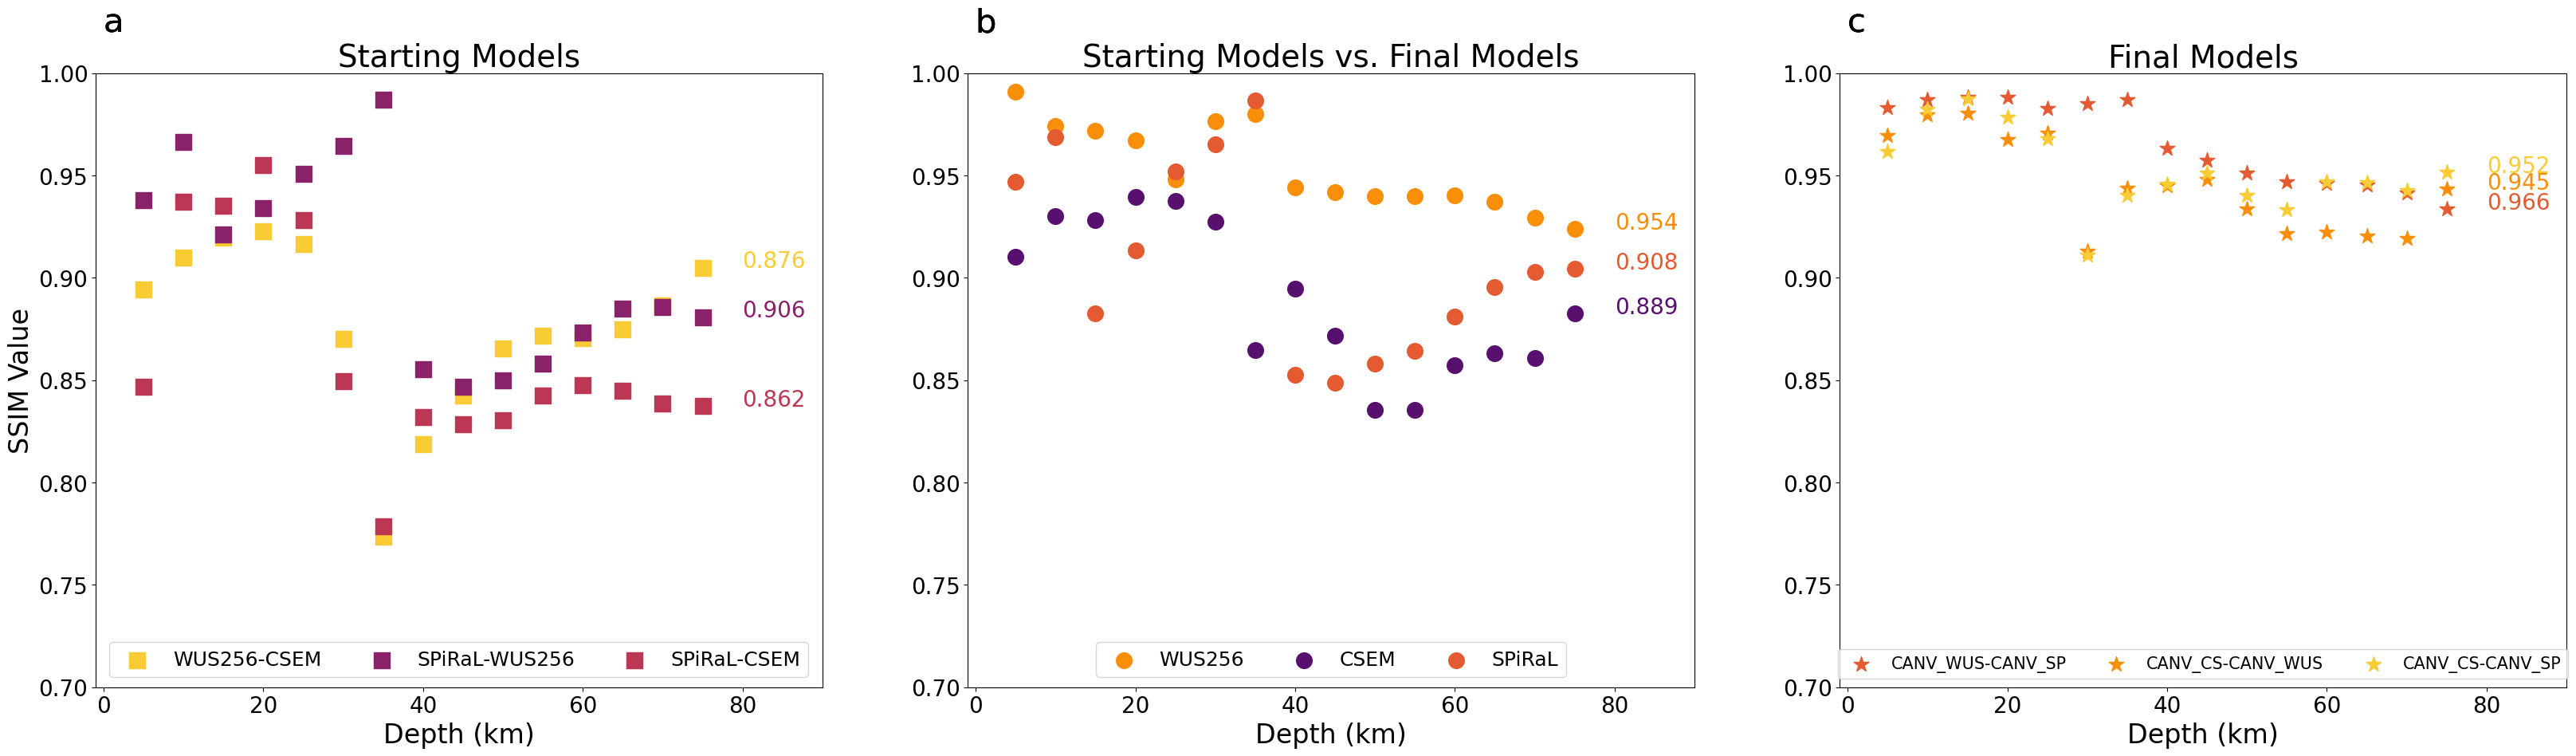

In [30]:
#matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

depths = np.arange(5,80,5)
cm_subsection = np.linspace(0.0,1.0,len(plot_vals))

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (40,10))

n = 0
for key in plot_vals:
    if key in ['SPRL-WUS2','SPRL-CSEM','WUS2-CSEM']:
        color = plt.cm.inferno(cm_subsection[n-3])
        if key == 'SPRL-WUS2':
            ax[0].scatter(depths, plot_vals[key], s = 200, c = color, marker = 's',label = 'SPiRaL-WUS256')
        elif key == 'SPRL-CSEM':
            ax[0].scatter(depths, plot_vals[key], s = 200, c = color, marker = 's',label = 'SPiRaL-CSEM')
        else:
            ax[0].scatter(depths, plot_vals[key], s = 200, c = color, marker = 's',label = 'WUS256-CSEM')
        ax[0].text(x = 80, y = plot_vals[key][-1], s = str(np.around(np.mean(plot_vals[key]),3)), color = color)
        ax[0].set_xlim([-1,90])
        ax[0].text(x = -0.05, y = 1.02, s = 'a', fontsize = 30)
        ax[0].set_ylim([0.7,1.0])
        ax[0].legend(loc='lower center', ncol = 3, fontsize = 18)
        ax[0].set_ylabel('SSIM Value', fontsize = 24)
        ax[0].set_xlabel('Depth (km)', fontsize = 24)
        ax[0].set_title('Starting Models', fontsize = 28)
    elif key in ['SPRL-CNSP', 'WUS2-CNWS','CSEM-CNCS']:
        color = plt.cm.inferno(cm_subsection[n-3])
        if key == 'SPRL-CNSP':
            ax[1].scatter(depths, plot_vals[key], s = 200, c = color, marker = 'o',label = 'SPiRaL')
        elif key == 'WUS2-CNWS':
            ax[1].scatter(depths, plot_vals[key], s = 200, c = color, marker = 'o',label = 'WUS256')
        else:
            ax[1].scatter(depths, plot_vals[key], s = 200, c = color, marker = 'o',label = 'CSEM')
        ax[1].text(x = 80, y = plot_vals[key][-1], s = str(np.around(np.mean(plot_vals[key]),3)), color = color)
        ax[1].set_xlim([-1,90])
        ax[1].text(x = -0.05, y = 1.02, s = 'b', fontsize = 30)
        ax[1].set_ylim([0.7,1.0])
        ax[1].legend(loc='lower center', ncol = 3, fontsize = 18)
        ax[1].set_xlabel('Depth (km)', fontsize = 24)
        ax[1].set_title('Starting Models vs. Final Models', fontsize = 28)
    elif key in ['CNCS-CNSP','CNCS-CNWS','CNWS-CNSP']:
        color = plt.cm.inferno(cm_subsection[n-6])
        if key == 'CNCS-CNSP':
            ax[2].scatter(depths, plot_vals[key], s = 200, c = color, marker = '*',label = 'CANV_CS-CANV_SP')
        elif key == 'CNCS-CNWS':
            ax[2].scatter(depths, plot_vals[key], s = 200, c = color, marker = '*',label = 'CANV_CS-CANV_WUS')
        else:
            ax[2].scatter(depths, plot_vals[key], s = 200, c = color, marker = '*',label = 'CANV_WUS-CANV_SP')
        ax[2].text(x = 80, y = plot_vals[key][-1], s = str(np.around(np.mean(plot_vals[key]),3)), color = color)
        ax[2].set_xlim([-1,90])
        ax[2].text(x = -0.05, y = 1.02, s = 'c', fontsize = 30)
        ax[2].set_ylim([0.7,1.0])
        ax[2].legend(loc='lower center', ncol = 3, fontsize = 15)
        ax[2].set_xlabel('Depth (km)', fontsize = 24)
        ax[2].set_title('Final Models', fontsize = 28)
    n+=1
    
plt.savefig('Figure6_SSIM_Full.jpg')
#plt.show()

In [102]:
from skimage import img_as_float
from skimage.metrics import structural_similarity as ssim

orig = cv2.imread('./SSIM/10.0km/CSEM_VS_10.0km.png')
target = cv2.imread('./SSIM/10.0km/WUS2_VS_10.0km.png')

mssim, gradient, full = ssim(orig, target, channel_axis = 2, gradient = True, full = True)

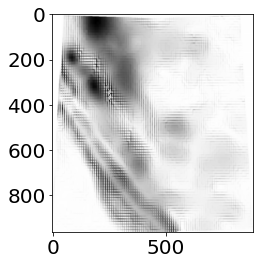

In [103]:
plt.imshow((full*255).astype('uint8'))

In [66]:
sp_dep = xr.Dataset(full,
    coords={
        "longitude": np.linspace(lon_min, lon_max, 101),
        "latitude": np.linspace(lat_min, lat_max, 101),
    },
    attrs={"radius_in_meters": 6371e3},
)

TypeError: unhashable type: 'numpy.ndarray'

In [52]:
fig = pygmt.Figure()

cmap = 'magma'
fig.plot(full, 
              projection='L-119.5/37.25/31.5/43.0/7.5c', region = [-124.5,-114.15,32.6,42],cmap=cmap, frame = None)

GMTInvalidInput: Expected a numpy 1d array, got 2d.